# Modeling-PUFs-Results

### Imports / Data / Helpers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()

In [3]:
df = pd.read_csv('results.csv')
df = df.round({'Accuracy': 4, 'Time': 3})
df['Training_CRP'] = (df['CRP'] * 0.80).astype(int)
df.loc[:, 'Training_CRP'] = df['Training_CRP'].astype('string')
df

,Name,CRP,Model,Accuracy,Time,Training_CRP
0,apuf,5000,LogisticRegressionModel,0.9890,0.031,4000
1,apuf,5000,RPropLogisticRegressionModel,0.7930,0.037,4000
2,apuf,5000,SupportVectorMachineModel,0.9500,0.450,4000
3,apuf,5000,DeepLearningModel,0.9780,4.028,4000
4,apuf,10000,LogisticRegressionModel,0.9915,0.059,8000
...,...,...,...,...,...,...
115,5-xorapuf,100000,DeepLearningModel,0.5038,22.221,80000
116,5-xorapuf,500000,LogisticRegressionModel,0.4984,0.590,400000
117,5-xorapuf,500000,RPropLogisticRegressionModel,0.5030,4.210,400000
118,5-xorapuf,500000,SupportVectorMachineModel,0.4983,269.512,400000


In [4]:
def graph_accuracy(model: str):
    g = sns.relplot(x='Training_CRP', y='Accuracy',
            hue='Name', height=4, aspect=2,
            kind='line', errorbar=None, marker='.', markersize=15, 
            data=df.loc[df['Model'] == model])
    labels = [x[:-3] + 'k' for x in pd.unique(df['Training_CRP'])]
    g.set_xticklabels(labels=labels)
    g.set(ylim=[.45, 1.05])
    g.fig.suptitle(f"{model}: Accuracy vs. #CRPs", y=1)
    g.set_axis_labels("#Challenge Response Pairs (CRPs)", "Accuracy")

In [5]:
def graph_time(model: str):
    g = sns.relplot(x='Training_CRP', y='Time',
            hue='Name', height=4, aspect=2,
            kind='line', errorbar=None, marker='.', markersize=15, 
            data=df.loc[df['Model'] == model])
    labels = [x[:-3] + 'k' for x in pd.unique(df['Training_CRP'])]
    g.set_xticklabels(labels=labels)
    g.fig.suptitle(f"{model}: Training Time vs. #CRPs", y=1)
    g.set_axis_labels("#Challenge Response Pairs (CRPs)", "Time (s)")

# Tables for Each Model

## Logistic Regression

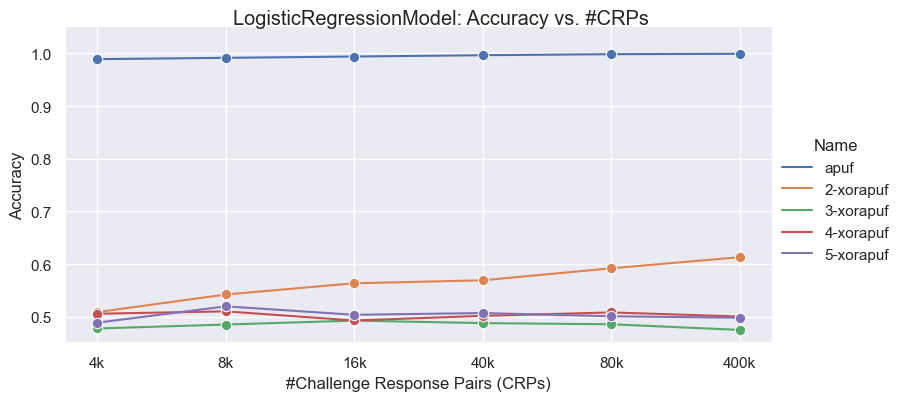

In [6]:
graph_accuracy('LogisticRegressionModel')

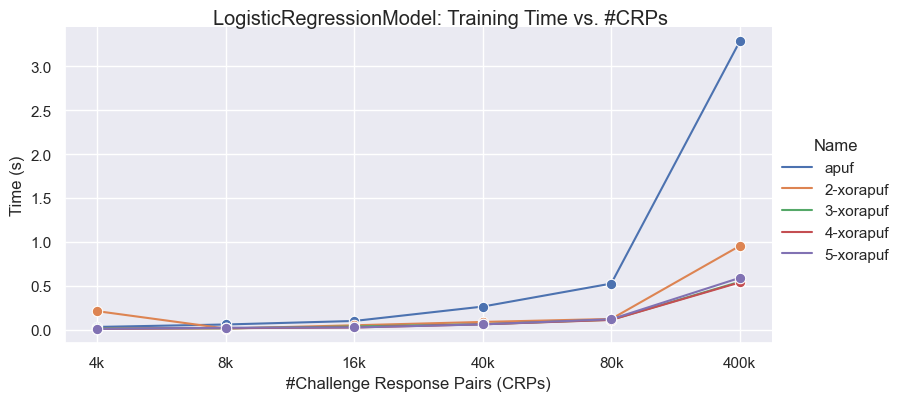

In [7]:
graph_time('LogisticRegressionModel')

## RProp Logistic Regression

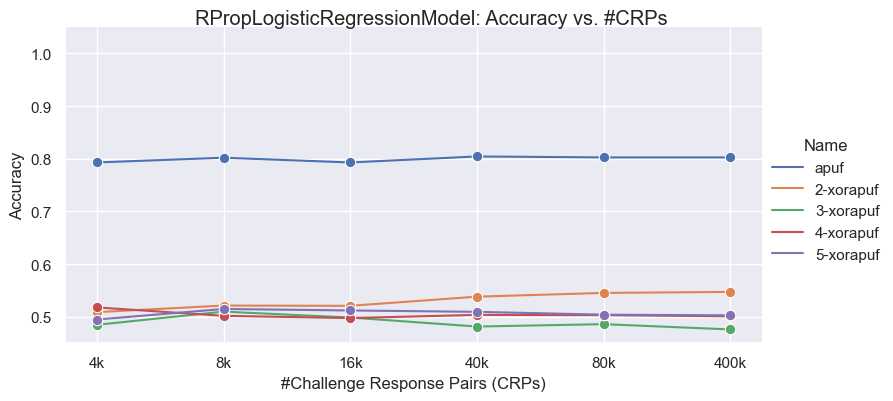

In [8]:
graph_accuracy('RPropLogisticRegressionModel')

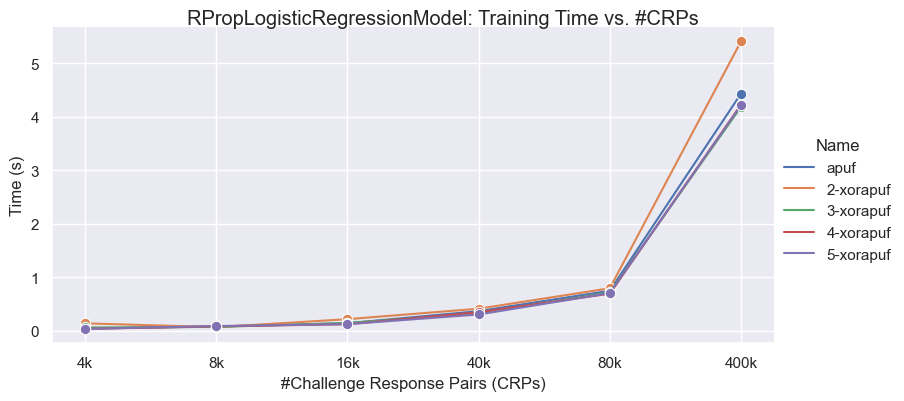

In [9]:
graph_time('RPropLogisticRegressionModel')

## Support Vector Machine

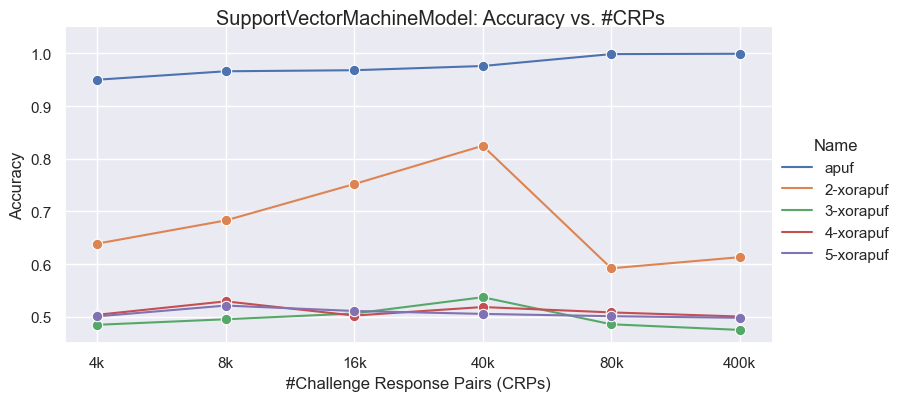

In [10]:
graph_accuracy('SupportVectorMachineModel')

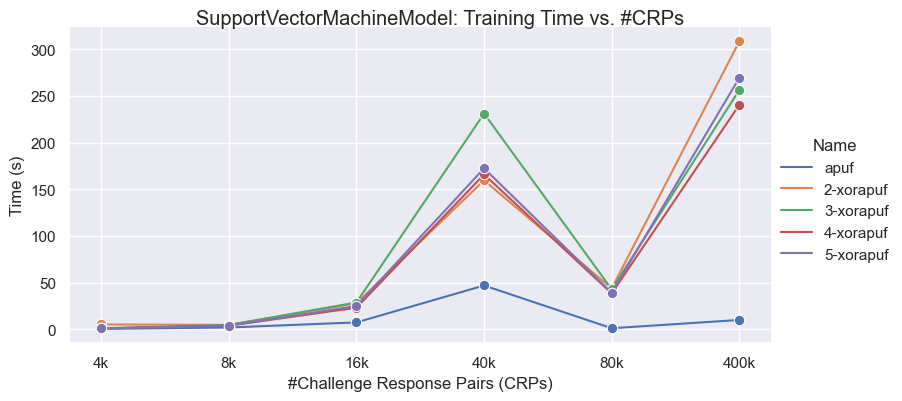

In [11]:
graph_time('SupportVectorMachineModel')

## Deep Learning

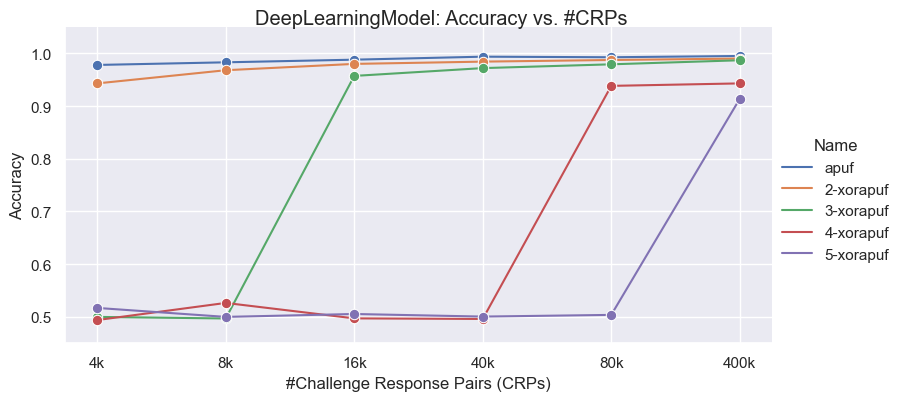

In [12]:
graph_accuracy('DeepLearningModel')

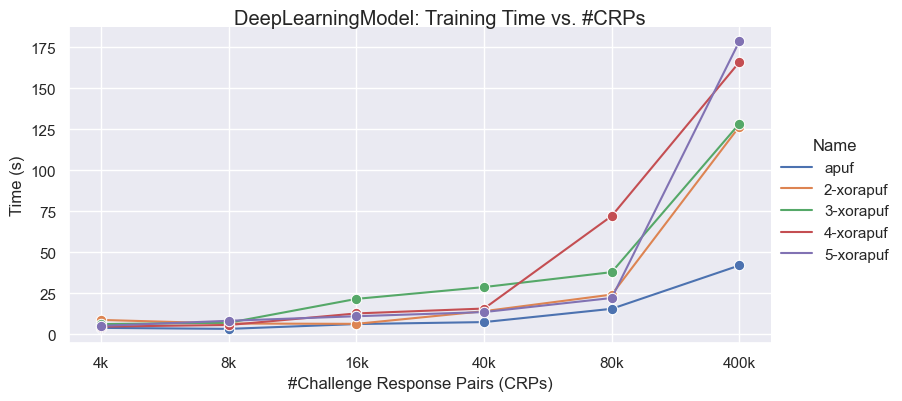

In [13]:
graph_time('DeepLearningModel')